A silhouette score is an indicator of the quality of clusters. Silhouette analysis involves plotting out a series of silhouette coefficients. The silhouette coeffcient is calculated per datapoint:

1) Calculate the cluster cohesion for a point $x^{(i)}$ belonging to a cluster $C$ based on the average distance to all other points in the cluster: $$a^{(i)} = \frac{1}{|C| - 1} \sum_{x^{(j)} \in C \setminus \{ x^{(i)} \}} d(x^{(i)}, x^{(j)})$$

2) Calculate the cluster separation as the average distance between $x^{(i)}$ belonging to cluster $C$ and the datapoints in the next closest cluster $C'$: $$b^{(i)} = \frac{1}{|C'|} \sum_{x^{(j)} \in C'} d(x^{(i)}, x^{(j)})$$

3) Calculate the silhouette coefficent of $x^{(i)}$, $s^{(i)}$: $$s^{(i)} = \frac{b^{(i)} - a^{(i)}}{\max \left(b^{(i)},a^{(i)} \right) },$$ and repeat this for all datapoints.

The coefficeint ranges between -1 to 1, and is maximal when $b^{(i)} \gg a^{(i)}$, indicating that the clusters are tightly packed relative to their distance to the next cluster. If the coefficient if 0, the clusters are equally diffuse and separated, and a negative score indicates that clusters are likely leaking into each other. The score (the group or average of the group of all coefficients) can be found in scikit-learn.

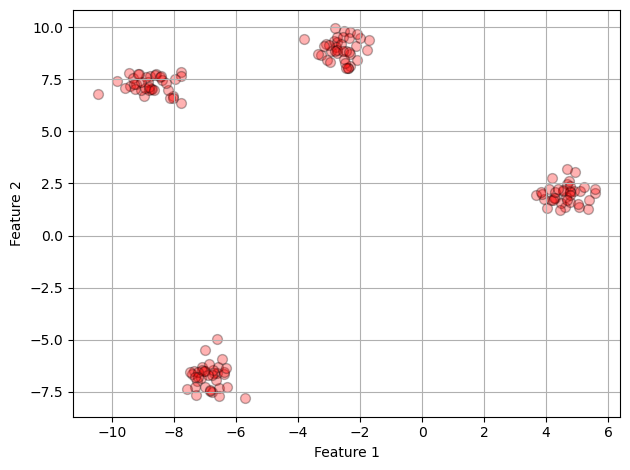

c:\Users\sadit\miniconda3\envs\dataexercises\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=4,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=42)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='red', marker='o', edgecolor='black', s=50, alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=42)
y_km = km.fit_predict(X)

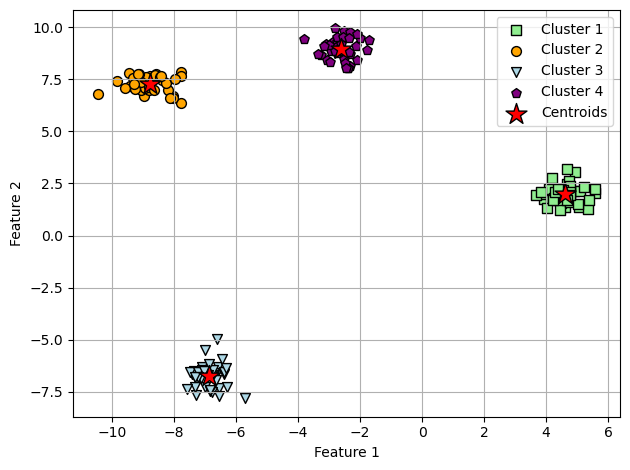

In [8]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50, c='purple', marker='p', edgecolor='black', label='Cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = len(cluster_labels)

silhouettes = silhouette_samples(X, y_km, metric='euclidean')

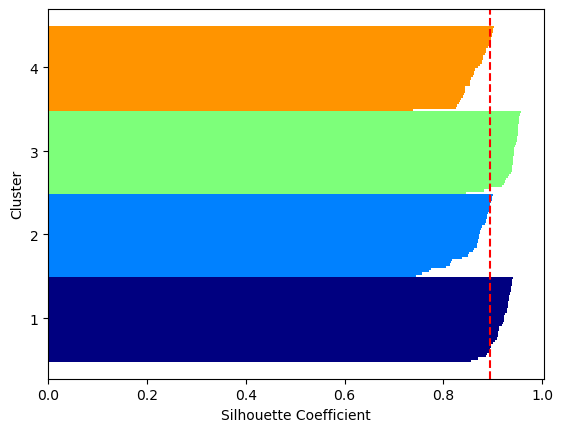

Mean Silhouette Score: 0.894 +/- 0.045


In [7]:
from matplotlib import cm
import matplotlib.pyplot as plt

upper_bound, lower_bound = 0, 0
yticks = []

for idx, cluster in enumerate(cluster_labels):
    cluster_silhouettes = silhouettes[y_km == cluster]
    cluster_silhouettes.sort()
    
    upper_bound += len(cluster_silhouettes)
    color = cm.jet(float(idx) / n_clusters)

    plt.barh(range(lower_bound, upper_bound), cluster_silhouettes, height=1.0, edgecolor='none', color=color)
    yticks.append((lower_bound + upper_bound) / 2.)

    lower_bound += len(cluster_silhouettes)

silhouette_mean = np.mean(silhouettes)

plt.axvline(silhouette_mean, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)

plt.ylabel("Cluster")
plt.xlabel('Silhouette Coefficient')
plt.show()

print(f"Mean Silhouette Score: {silhouette_mean:.3f} +/- {np.std(silhouettes):.3f}")

None of the silhouette scores are close to 0, and the average is quite high.

c:\Users\sadit\miniconda3\envs\dataexercises\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


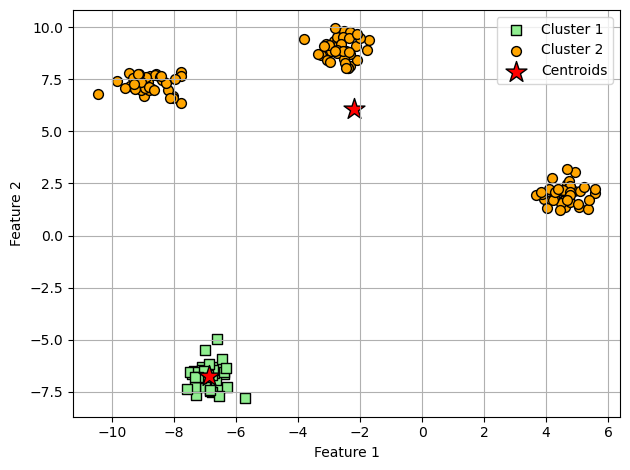

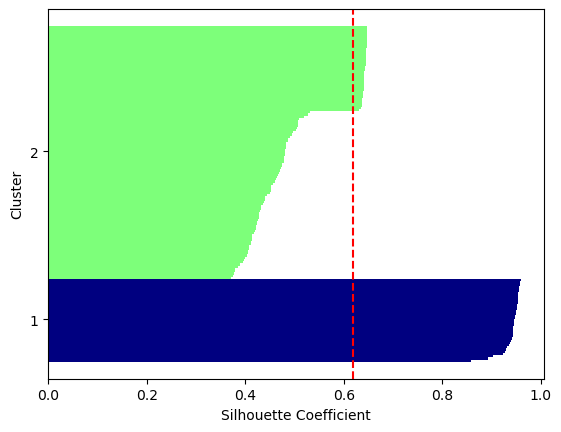

Mean Silhouette Score: 0.619 +/- 0.204


In [12]:
# We can now compare these results to a bad clustering

km_bad = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=42)
y_km = km_bad.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(km_bad.cluster_centers_[:, 0], km_bad.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()


cluster_labels = np.unique(y_km)
n_clusters = len(cluster_labels)

silhouettes = silhouette_samples(X, y_km, metric='euclidean')



upper_bound, lower_bound = 0, 0
yticks = []

for idx, cluster in enumerate(cluster_labels):
    cluster_silhouettes = silhouettes[y_km == cluster]
    cluster_silhouettes.sort()
    
    upper_bound += len(cluster_silhouettes)
    color = cm.jet(float(idx) / n_clusters)

    plt.barh(range(lower_bound, upper_bound), cluster_silhouettes, height=1.0, edgecolor='none', color=color)
    yticks.append((lower_bound + upper_bound) / 2.)

    lower_bound += len(cluster_silhouettes)

silhouette_mean = np.mean(silhouettes)

plt.axvline(silhouette_mean, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)

plt.ylabel("Cluster")
plt.xlabel('Silhouette Coefficient')
plt.show()

print(f"Mean Silhouette Score: {silhouette_mean:.3f} +/- {np.std(silhouettes):.3f}")

This is visibly worse, with the silhouette scores having a much worse mean, and high variance. It is obvious that trying to assign 3 different clusters to 1 centroid is what the algortihm resulted in when forced to use $k = 2$.